# **Weights Initialization**

Wrong ways of weights initialization
* Weights initialized to Zero
* Weights initialized to non-zero constant
* Random Weights initialization (Small case and large case)

Correct ways of weights initialization
* Xavier||Glorot weights initialization
    - Normal
    - Uniform
* He weights initialization
    - Normal
    - Uniform

## **Wrong weights initialization**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

##### **Reading a Dataset**

In [3]:
data = load_iris()

X, y = data.data, data.target

### **Weights initialized to zero**

#### **For Relu**

In [5]:
X.shape

(150, 4)

In [15]:
model = Sequential([
    keras.Input(shape=(4,)),
    Dense(4, activation='relu', kernel_initializer='zero'),
    Dense(3, activation='sigmoid', kernel_initializer='zero')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
initial_weights = model.get_weights()

for i in initial_weights:
    print(i)
    print('\n')

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[0. 0. 0. 0.]


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


[0. 0. 0.]




In [17]:
# model training

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3067 - loss: 1.0987  
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 1.0986 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3333 - loss: 1.0986 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3333 - loss: 1.0986 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3333 - loss: 1.0986 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 1.0986 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3333 - loss: 1.0986


In [18]:
# model weights after training
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([-0.00097964, -0.0015838 ,  0.00155601], dtype=float32)]

We can observe that, weight are still wont get updated


#### **For Tanh function**

In [19]:
model = Sequential([
    keras.Input(shape=(4,)),
    Dense(4, activation='tanh', kernel_initializer='zero'),
    Dense(3, activation='sigmoid', kernel_initializer='zero')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [ ]:
# model training

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3333 - loss: 1.0987
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3333 - loss: 1.0987
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3333 - loss: 1.0987
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3333 - loss: 1.0986


In [22]:
# model weights after training

model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([ 0.00042195, -0.00055248, -0.00117717], dtype=float32)]

The weight values wont change after training also

#### **For sigmoid function**

In [23]:
model = Sequential([
    keras.Input(shape=(4,)),
    Dense(4, activation='sigmoid', kernel_initializer='zero'),
    Dense(3, activation='sigmoid', kernel_initializer='zero')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X, y, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3333 - loss: 1.0989
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3333 - loss: 1.0987
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3333 - loss: 1.0986
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3333 - loss: 1.0987
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3333 - loss: 1.0985 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3333 - loss: 1.0985
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3333 - loss: 1.0984
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3333 - loss: 1.0984
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3333 - loss: 1.0983
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3333 - loss: 1.0981


In [26]:
final_weights = model.get_weights()

for i in final_weights:
  print(i)
  print('\n')

[[-0.03209278 -0.03209278 -0.03209278 -0.03209278]
 [ 0.01339228  0.01339228  0.01339228  0.01339228]
 [-0.04954509 -0.04954509 -0.04954509 -0.04954509]
 [-0.0507349  -0.0507349  -0.0507349  -0.0507349 ]]


[-0.0078417 -0.0078417 -0.0078417 -0.0078417]


[[ 0.00577112 -0.00232584 -0.00575723]
 [ 0.00577112 -0.00232584 -0.00575723]
 [ 0.00577112 -0.00232584 -0.00575723]
 [ 0.00577112 -0.00232584 -0.00575723]]


[-0.00160586 -0.00088014  0.00079388]




It behaves like perceptron

No capture of Non-linearity

### **Non-zero constant weights**

In [27]:
from keras.initializers import Constant

model = Sequential([
    keras.Input(shape=(4,)),
    Dense(4, activation='relu', kernel_initializer=Constant(value=0.5)),
    Dense(3, activation='sigmoid', kernel_initializer=Constant(value=0.5))
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X, y, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1867 - loss: 1.0960 
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1267 - loss: 1.0826 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1200 - loss: 1.0788
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1000 - loss: 1.0761 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0867 - loss: 1.0750 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0867 - loss: 1.0743 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0733 - loss: 1.0739 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0800 - loss: 1.0727 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1067 - loss: 1.0710 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1000 - loss: 1.0700 


In [30]:
final_weights = model.get_weights()

for i in final_weights:
  print(i)
  print('\n')

[[0.47734377 0.47734377 0.47734377 0.47734377]
 [0.45485675 0.45485675 0.45485675 0.45485675]
 [0.54531157 0.54531157 0.54531157 0.54531157]
 [0.5498734  0.5498734  0.5498734  0.5498734 ]]


[-0.03997959 -0.03997959 -0.03997959 -0.03997959]


[[0.48949552 0.50240016 0.51060843]
 [0.48949552 0.50240016 0.51060843]
 [0.48949552 0.50240016 0.51060843]
 [0.48949552 0.50240016 0.51060843]]


[ 0.02918132 -0.00465398 -0.02626736]




Same, behaves as a perceptron (how much the model complex is)

No, non linearity is learned from the data

## **Correct weights initialization**

#### **Creating a dataset**

In [31]:
from sklearn.datasets import make_classification

In [36]:
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=0.9
)

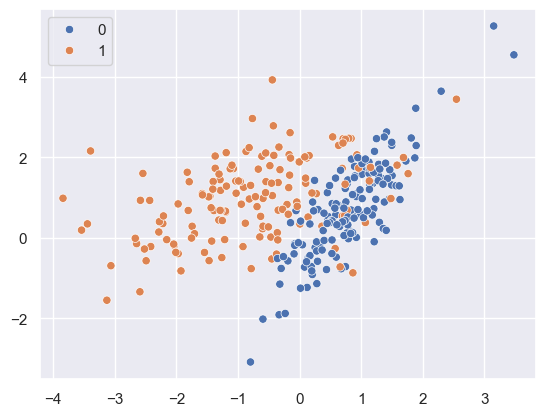

In [40]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

#### **Using Xavier/Glorot wieghts initialization**

In [72]:
# defining an classifier
# by default keras uses the weights initialization of "glorot_uniform"
# xavier weights best works for tanh activation fn

from keras import layers

model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(32, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(128, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(64, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [43]:
initial_weights = model.get_weights()

initial_weights[0]

array([[-0.15594491, -0.13740449, -0.02694333,  0.1321706 , -0.3520217 ,
        -0.00293152, -0.22174993, -0.4585194 ,  0.05991708, -0.3160705 ,
        -0.18139125, -0.2952418 , -0.24725047,  0.4646914 , -0.14616218,
         0.02389587, -0.01854984, -0.24811289, -0.0523333 , -0.11613242,
        -0.40152857, -0.34222835, -0.03875492, -0.3669971 ,  0.15773483,
         0.00965068, -0.02427087, -0.07587793,  0.06024035,  0.41558653,
        -0.09930421, -0.07129818],
       [-0.3892203 ,  0.32554555,  0.3906139 ,  0.10287303, -0.09991042,
        -0.01013212,  0.13543478,  0.52856386,  0.02927983,  0.21218888,
        -0.4101068 ,  0.52144974,  0.36193255, -0.46364844, -0.4294241 ,
        -0.02805355, -0.14624913, -0.06112825,  0.38912967,  0.14303564,
         0.2868304 ,  0.01682101, -0.08702005,  0.0675793 , -0.216792  ,
         0.12811299,  0.40753263, -0.28395036, -0.26622757, -0.05926399,
        -0.38974807,  0.04178957]], dtype=float32)

In [44]:
# training the model

history = model.fit(
    X, y,
    validation_split = 0.2,
    epochs = 10
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6708 - loss: 0.5949 - val_accuracy: 0.8167 - val_loss: 0.4272
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9208 - loss: 0.3369 - val_accuracy: 0.8833 - val_loss: 0.3737
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9208 - loss: 0.2909 - val_accuracy: 0.8833 - val_loss: 0.3925
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9208 - loss: 0.2808 - val_accuracy: 0.8500 - val_loss: 0.3988
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9250 - loss: 0.2784 - val_accuracy: 0.8500 - val_loss: 0.4040
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9208 - loss: 0.2761 - val_accuracy: 0.8500 - val_loss: 0.4018
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9208 - loss: 0.2775 - val_accuracy: 0.8833 - val_loss: 0.4034
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9250 - loss: 0.2749 - val_accuracy: 0.8833 - val_loss: 0.3993


In [45]:
final_weights = model.get_weights()

final_weights[0]

array([[-0.15184043, -0.15326911, -0.01141863,  0.12133897, -0.36800677,
        -0.02529599, -0.23654063, -0.47025296,  0.04986299, -0.3231485 ,
        -0.20035438, -0.30898476, -0.26484987,  0.46034864, -0.16695079,
         0.04344333, -0.03818167, -0.252598  , -0.0383439 , -0.13583858,
        -0.38796327, -0.3629372 , -0.03082708, -0.38872975,  0.14552845,
         0.02659462, -0.0384676 , -0.06539783,  0.04333874,  0.4317034 ,
        -0.08476418, -0.08995159],
       [-0.37924054,  0.3297757 ,  0.37297094,  0.10536004, -0.0897353 ,
        -0.00294973,  0.13661925,  0.5209868 ,  0.03557293,  0.2074667 ,
        -0.39167887,  0.515655  ,  0.35191706, -0.46143273, -0.41551468,
        -0.02672303, -0.14240678, -0.04865351,  0.36539313,  0.14391589,
         0.28862166,  0.02120677, -0.08745103,  0.07022949, -0.20720845,
         0.12352356,  0.41314012, -0.2769422 , -0.2544196 , -0.05946947,
        -0.40131465,  0.04513448]], dtype=float32)

We can observe that the weights are changed

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

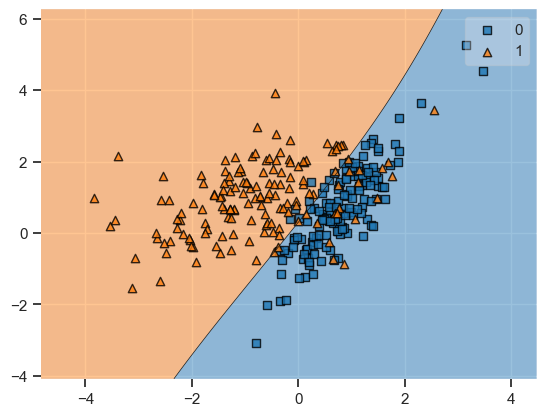

In [46]:
# visualizing the boundary

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model)

#### **Using He wieghts initialization**

In [85]:
# he best works for relu activation function

model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [87]:
initial_weights = model.get_weights()

initial_weights[0]

array([[-0.08444911,  2.0336123 , -0.18393226, -0.48858944,  0.65268326,
        -1.3276396 ,  0.3155994 ,  1.2335263 ,  0.4313121 ,  0.84667665,
         2.1820147 , -0.91442263,  0.5502504 , -0.9749856 ,  1.2013537 ,
        -1.4486399 , -0.46440846, -1.6052703 , -0.51310456,  1.1028358 ,
         0.8443392 ,  0.92632157, -0.24892782,  0.88230354,  1.1399951 ,
        -1.3418071 ,  0.9798323 ,  0.44172293, -1.5246092 , -0.04911522,
        -0.5672851 ,  1.7060053 ],
       [ 1.9688913 ,  0.7576171 ,  0.4303794 , -0.6425464 , -1.3329211 ,
         0.98788697,  0.15557729, -1.7928901 ,  0.82613814,  0.42230126,
        -1.8928006 , -0.07127038,  1.0947827 ,  1.3041397 ,  1.3830124 ,
        -0.2651095 , -0.7033325 ,  0.02271271, -0.1374607 , -0.6680002 ,
         1.0796634 ,  0.8579231 , -0.7621424 , -1.898969  ,  0.37090874,
        -1.0094727 ,  0.7661446 , -1.4992378 , -0.5330926 , -0.14537688,
        -1.6608654 ,  0.51141566]], dtype=float32)

In [88]:
# model training

model.fit(
    X, y,
    validation_split = 0.2,
    epochs = 10
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9292 - loss: 0.2399 - val_accuracy: 0.8833 - val_loss: 0.4050
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9292 - loss: 0.2343 - val_accuracy: 0.8333 - val_loss: 0.3878
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9292 - loss: 0.2377 - val_accuracy: 0.8500 - val_loss: 0.3908
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9208 - loss: 0.2371 - val_accuracy: 0.8833 - val_loss: 0.4105
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9250 - loss: 0.2301 - val_accuracy: 0.8333 - val_loss: 0.3794
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9292 - loss: 0.2328 - val_accuracy: 0.8833 - val_loss: 0.4095
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9250 - loss: 0.2331 - val_accuracy: 0.8500 - val_loss: 0.3830
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9208 - loss: 0.2230 - val_accuracy: 0.8500 - val_loss: 0.3769


In [89]:
final_weights = model.get_weights()

final_weights[0]

array([[-0.08436901,  2.0382712 , -0.18221219, -0.5058482 ,  0.64529073,
        -1.3578545 ,  0.3132141 ,  1.2382857 ,  0.43131164,  0.8406093 ,
         2.1964867 , -0.92556286,  0.5509025 , -0.97666365,  1.1995511 ,
        -1.4603653 , -0.45968682, -1.6173666 , -0.5199141 ,  1.1047684 ,
         0.8434714 ,  0.92984074, -0.2560313 ,  0.8824846 ,  1.1413342 ,
        -1.3392164 ,  0.9760614 ,  0.45249513, -1.5336568 , -0.04378397,
        -0.5747435 ,  1.7154388 ],
       [ 1.9712408 ,  0.75334334,  0.4288866 , -0.6427721 , -1.3276399 ,
         0.9716531 ,  0.15176   , -1.7878522 ,  0.82570475,  0.4256585 ,
        -1.8815355 , -0.07724024,  1.0935538 ,  1.3074818 ,  1.3812883 ,
        -0.25871164, -0.7005337 ,  0.02710889, -0.15448435, -0.6704454 ,
         1.081063  ,  0.85296446, -0.7479839 , -1.896932  ,  0.36552918,
        -1.038374  ,  0.76571894, -1.493037  , -0.53576946, -0.15246688,
        -1.6843965 ,  0.50505626]], dtype=float32)

We can observe the weights change

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

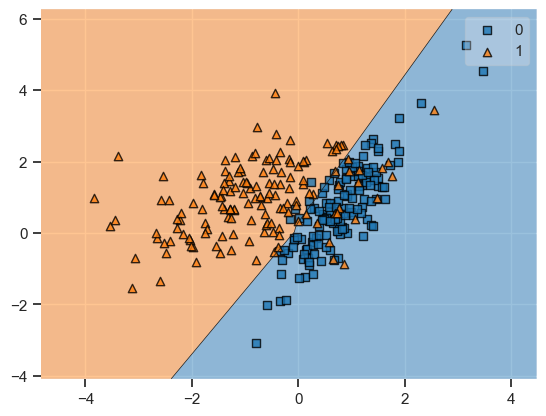

In [95]:
plot_decision_regions(X, y, clf=model)

In [106]:
# predicting the values

probs = model.predict(X)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [114]:
y_pred = (probs >= 0.5).astype(int)

y_pred[:5]

array([[1],
       [0],
       [0],
       [0],
       [0]])

In [115]:
y[:5]

array([1, 0, 0, 0, 0])

In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       150
           1       0.95      0.87      0.91       150

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

